In [36]:
import numpy as np
import pandas as pd
import json
import glob
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [7]:
f=1 # select one coordinates every f frames
t=20 # fps

In [ ]:
def dir_change(filename):
    direction = []
    if json_data['camera_direction']=='left':
        for i in range(int(C.shape[0]/f)-1):
            di=[C[0][f*(i)]-C[0][f*(i+1)],C[1][f*(i+1)]-C[1][f*(i)]]
            direction.append(di)
    else:
        for i in range(int(C.shape[0]/f)-1):
            di=[C[0][f*(i+1)]-C[0][f*(i)],C[1][f*(i+1)]-C[1][f*(i)]]
            direction.append(di)

    direction = pd.DataFrame(direction)
    vdc=[] # vertical direction change
    hdc=[] # horizontal direction change
    for i in range(int(direction.shape[0]-1)):
        vdc.append(direction[1][i+1]-direction[1][i]) 
        hdc.append(direction[0][i+1]-direction[0][i])
    return vdc, hdc

In [15]:
avgV=[]
maxV=[]
avgA=[]
maxA=[]
shot=[]
goal=[]
x=[]
y=[]
camera_direction=[]
velocity=[]
acceleration=[]
coordinates=[]
ycos=[]
horizontal=[]
vertical=[]
dirlist = sorted(glob.glob('Data/*'))
for dirname in dirlist[:]:
    filelist = sorted(glob.glob('{}/*.json'.format(dirname)))
    for filename in filelist:
        with open(filename,'r') as file:
            json_data = json.load(file)
        if json_data['tracks']['ball']!=[]:
            start_frame=json_data['event_frames']['shot']['start']
            end_frame=json_data['event_frames']['shot']['end']                                   
            C=pd.DataFrame.from_dict([json_data['tracks']['ball'][0]['x_ov'][start_frame:end_frame+1],json_data\
                                      ['tracks']['ball'][0]['y_ov'][start_frame:end_frame+1]]).dropna(axis='columns').T.reset_index(drop=True)
            
            
            V=[]
            coordinate=[]
            yco=[]
            for i in range(int(C.shape[0]/f)-1):
                v=((C[0][f*(i+1)]-C[0][f*(i)])**2+(C[1][f*(i+1)]-C[1][f*(i)])**2)**0.5*(t/f)
                V.append(v)
                
                x_ov = abs(C[0][i])
                y_ov = C[1][i]
                coordinate.append(x_ov)
                coordinate.append(y_ov)
                yco.append(y_ov)
            
            coordinates.append(coordinate)
            ycos.append(yco)
                
            avgV.append(np.mean(V))
            maxV.append(np.max(V))
            velocity.append(V)
            

            A=[]
            for i in range(len(V)-1):
                a=(V[i+1]-V[i])*(t/f)
                A.append(a)
            avgA.append(np.mean(A))
            maxA.append(np.max(A))
            acceleration.append(A)

            shot.append(json_data['event_frames']['shot']['type'])
            goal.append(json_data['event_frames']['shot']['goal'])
            
            for i in range()
            
            x.append(json_data['tracks']['ball'][0]['x_ov'][start_frame])
            y.append(json_data['tracks']['ball'][0]['y_ov'][start_frame])
            camera_direction.append(json_data['camera_direction'])
            
            direction = []
            if json_data['camera_direction']=='left':
                for i in range(int(C.shape[0]/f)-1):
                    di=[C[0][f*(i)]-C[0][f*(i+1)],C[1][f*(i+1)]-C[1][f*(i)]]
                    direction.append(di)
            else:
                for i in range(int(C.shape[0]/f)-1):
                    di=[C[0][f*(i+1)]-C[0][f*(i)],C[1][f*(i+1)]-C[1][f*(i)]]
                    direction.append(di)

            direction = pd.DataFrame(direction)
            vdc=[] # vertical direction change
            hdc=[] # horizontal direction change
            for i in range(int(direction.shape[0]-1)):
                vdc.append(direction[1][i+1]-direction[1][i]) 
                hdc.append(direction[0][i+1]-direction[0][i])

            horizontal.append(hdc)
            vertical.append(vdc)
df=pd.DataFrame([avgV,maxV,avgA,maxA,shot,x,y,goal,camera_direction],index=['Avg vel','Max vel','Avg acc','Max acc','Shot type','x','y','goal', 'camera_direction']).T

In [ ]:
dir_change = pd.DataFrame(vertical, df['Shot type']).reset_index().dropna(subset = ['Shot type'])
dir_change
dir_change=dir_change.replace({'Shot type': map})
dir_change['Shot type']=dir_change['Shot type'].astype('int')
dir_change=dir_change[dir_change['Shot type']<=m]
dir_change=dir_change.fillna(0)

In [ ]:
dir_change.to_csv('dir_change.csv')

In [ ]:
df['Shot type'].unique()

In [ ]:
vdf = pd.DataFrame(velocity).fillna(0)
vdf['Shot type'] = df['Shot type']

In [ ]:
map={'power': 0, 'skip': 1,'lob':2,'sweep':3,'layout':4,'backhand':5,'turn':6,'center':7}
m=2

In [ ]:
v_df=pd.DataFrame(velocity,df['Shot type']).reset_index()
a_df=pd.DataFrame(acceleration,df['Shot type']).reset_index()

In [ ]:
df=df.replace({'Shot type': map}).dropna()
df=df[df['Shot type']<=m]
df['Shot type']=df['Shot type'].astype('int')
df

In [ ]:
vdf=vdf.replace({'Shot type': map}).dropna()
vdf=vdf[vdf['Shot type']<=m]
vdf['Shot type']=vdf['Shot type'].astype('int')
vdf

In [ ]:
co=pd.DataFrame(ycos, df['Shot type']).reset_index().dropna(subset = ['Shot type'])
co

In [ ]:
co=co.replace({'Shot type': map})
co['Shot type']=co['Shot type'].astype('int')
co=co[co['Shot type']<=m]
co=co.fillna(0)
co

In [ ]:
co.to_csv('yco.csv')

In [ ]:
vdf.to_csv('velocity.csv')

In [ ]:
f, ax = plt.subplots(nrows=2,ncols=3,figsize=(30,15))
j=0
for d in [v_df,a_df]:
    d=d.replace({'Shot type': map}).dropna(subset=['Shot type']).iloc[:,:70].fillna(0)
    d=d[d['Shot type']<=m]
    for i in range(3):
        ax[j,i].plot(d.loc[d['Shot type']==i].drop(['Shot type'],axis=1).iloc[0:1].T)
    j=j+1

In [ ]:
import matplotlib.pyplot as plt
for n in ['Avg vel','Max vel','Avg acc','Max acc']:
    ST0=df[df['Shot type']==0][n]
    ST1=df[df['Shot type']==1][n]
    ST2=df[df['Shot type']==2][n]
    plt.figure()
    plt.plot(ST0)
    plt.plot(ST1)
    plt.plot(ST2)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
x=df.iloc[:,2:3]
y=df.iloc[:,4:5]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=100)
clf=RandomForestClassifier(n_estimators=10,max_depth=3)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
clf_train_acc = clf.score(x_train,y_train)
clf_test_acc  = clf.score(x_test,y_test)
print('Random_forest training acuracy= ',clf_train_acc)
print('Random_forest test accuracy= ',clf_test_acc)

In [23]:
map2 = {'miss': 0, 'goal': 1, 'goalie_block':0, 'field_block':0}
df2 = df.loc[:, ['Shot type', 'x', 'y', 'goal', 'camera_direction']]
df2 = df2.replace({'goal': map2}).dropna(subset = ['goal'])
df2['goal'] = df2['goal'].astype('int')
for i in range(df2.shape[0]):
    if df2['camera_direction'][i] == 'left':
        df2['x'][i] = df2['x'][i]
df2

/Users/wyh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,Shot type,x,y,goal,camera_direction
0,center,8.9127,-1.76204,0,right
1,power,-5.00543,-0.180493,0,left
2,power,-7.6024,-1.79441,1,left
3,lob,-6.58841,-5.47973,0,left
4,skip,8.49635,-0.66743,0,right
5,skip,7.49041,-1.73391,1,right
6,power,7.76638,-5.41229,0,right
7,power,5.89216,-0.863486,1,right
8,skip,-9.8103,-5.97967,0,left
9,sweep,-10.3971,-1.36736,0,left


In [28]:
shot_dis = df2.loc[:, ['x','y', 'goal']]
# shot_dis['x'] = 12.5 - shot_dis['x']
goal = shot_dis[shot_dis['goal'] == 1]
miss = shot_dis[shot_dis['goal'] == 0]

In [37]:
def draw_pool(ax=None, color='black', lw=2, outer_lines=False):
    #scale = 10
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()
        
    ax.add_patch(
    patches.Rectangle(
            (-12.5,-10),   # (x,y)
            25,          # width
            20,          # height
            facecolor='#4dc9eb',#'#80D2F5', 
            edgecolor='k',
            linewidth=2
        )
    )
    # marker lines
    #r_goal_line = plt.Line2D((25-12.5,25-12.5),(0-10,20-10),lw=2.5,color='w')
    r_twom_line = plt.Line2D((23-12.5,23-12.5),(0-10,20-10),lw=2.25,color='#EF5A48')#color='#FF9696')
    r_fivem_line = plt.Line2D((20-12.5,20-12.5),(0-10,20-10),lw=2.5,color='#FFF697')#'#FFFF96')
    #plt.gca().add_line(r_goal_line)
    plt.gca().add_line(r_twom_line)
    plt.gca().add_line(r_fivem_line)

    #l_goal_line = plt.Line2D((0-12.5,0-12.5),(0-10,20-10),lw=2.5,color='w')
    l_twom_line = plt.Line2D((2-12.5,2-12.5),(0-10,20-10),lw=2.25,color='#EF5A48')
    l_fivem_line = plt.Line2D((5-12.5,5-12.5),(0-10,20-10),lw=2.5,color='#FFF697')
    #plt.gca().add_line(l_goal_line)
    plt.gca().add_line(l_twom_line)
    plt.gca().add_line(l_fivem_line)

    # l cage
    ax.add_patch(
        patches.Rectangle(
            (-1-12.5,10-1.5-10),   # (x,y)
            1,          # width
            3,          # height
            facecolor='w',
            edgecolor='k',
            linewidth=2,
            hatch='xxx'
        )
    )

    # r cage
    ax.add_patch(
        patches.Rectangle(
            (25-12.5,10-1.5-10),   # (x,y)
            1,          # width
            3,          # height
            facecolor='w',
            edgecolor='k',
            linewidth=2,
            hatch='xxx'
        )
    )

    plt.axis([-1-12.5, 26-12.5, 20-10, 0-10])
    plt.axis('off')
    
    return ax

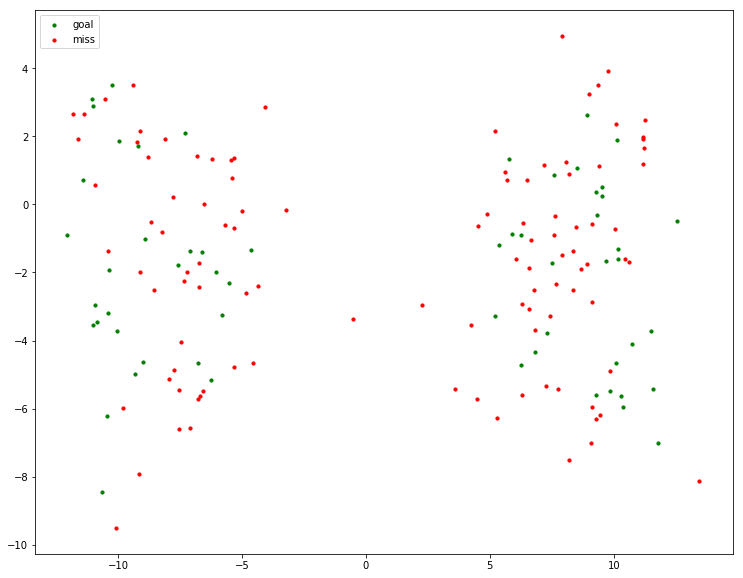

In [52]:
fig = plt.figure(figsize = (12.5,10))
ax1 = fig.add_subplot(111)
# ax1 = draw_pool(outer_lines=True)
# ax1.set_xlim(-14, 14)
# ax1.set_ylim(-10, 10)
ax1.scatter(goal['x'], goal['y'], s=10, c='g', marker="o", label='goal')
ax1.scatter(miss['x'], miss['y'], s=10, c='r', marker="o", label='miss')
plt.legend(loc='upper left');
plt.show()

In [45]:
sr = df2.loc[:, ['x','goal']]
bins = pd.cut(sr['x'], [0,1,2,3,4,5,6,7,8,9,10,11,12,13])
shot_rate = sr.groupby(bins)['goal'].agg(['count', 'sum'])

In [ ]:
bins = pd.cut(sr['x'], [0,1,2,3,4,5,6,7,8,9,10,11,12,13])
shot_rate = sr.groupby(bins)['goal'].agg(['count', 'sum'])

In [ ]:
df3 = pd.DataFrame(bins, sr['goal']).reset_index()
plt.hist(df3['goal'])

In [ ]:
shot_rate['percentage'] = shot_rate['sum']/shot_rate['count']
shot_rate.reset_index(inplace = True)

In [ ]:
shot_rate.reset_index(inplace = True)
shot_rate

In [ ]:
aaa = shot_rate['percentage'].drop([0,1,2,3]).values
aaa = aaa[::-1]
aaa[0] = 0.75
aaa

In [ ]:
x = np.linspace(0,9,9)
graph = plt.plot(x, aaa)
graph.set_title('Shot successful rate by range')

In [ ]:
graph = plt.plot(x, aaa)
graph.set_title('Shot successful rate by range')